# Test the aster_utils functions

Import **aster_utils.py**, numpy and matplotlib.

In [1]:
import aster_utils

import numpy as np
import matplotlib.pyplot as plt

Specify the directory that contains our ASTER L1T images:

In [2]:
directory='/storage/spestana/ASTER/AST_L1T/'

---
#### Test `aster_utils.aster_timestamps()`

We can find our HDF files here, and get their timestamps and filepaths:

In [3]:
df = aster_utils.aster_timestamps(directory,'hdf')
df.head()

,timestampUTC,filepath
0,2017-01-14 06:07:03+00:00,/storage/spestana/ASTER/AST_L1T/hdf/AST_L1T_00...
1,2017-01-14 06:07:12+00:00,/storage/spestana/ASTER/AST_L1T/hdf/AST_L1T_00...
2,2017-01-23 06:00:58+00:00,/storage/spestana/ASTER/AST_L1T/hdf/AST_L1T_00...
3,2017-01-23 06:01:07+00:00,/storage/spestana/ASTER/AST_L1T/hdf/AST_L1T_00...
4,2017-02-15 06:06:58+00:00,/storage/spestana/ASTER/AST_L1T/hdf/AST_L1T_00...


And we can find the GeoTIFF files here too:

In [4]:
df = aster_utils.aster_timestamps(directory,'tif')
df.head()

,timestampUTC,filepath
0,2017-01-14 06:07:03+00:00,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_Tu...
1,2017-01-14 06:07:03+00:00,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...
2,2017-01-14 06:07:03+00:00,/storage/spestana/ASTER/AST_L1T/hdf/output/AST...
3,2017-01-14 06:07:03+00:00,/storage/spestana/ASTER/AST_L1T/hdf/output/AST...
4,2017-01-14 06:07:03+00:00,/storage/spestana/ASTER/AST_L1T/hdf/output/AST...


---
#### Test `zonal_stats()` which includes conversion from DN to radiance `tir_dn2rad()`, and conversion from radiance to brightness temperature `tir_rad2tb()`

Specify the path to a shapefile to define our zone we want statistics for:

In [5]:
shapefile_filepath = '/home/spestana/git/goes-cues/shapefiles/GaylorPit_lon_89_west.shp'

Pick one of the aster geotiff files from our list. And specify that we want band 14 (this is a thermal infrared band around 11 microns).

In [6]:
aster_filepath = df.filepath[10]
aster_band = 14

In [7]:
tb_mean, tb_max, tb_min, tb_std, masked_aster_tb = aster_utils.zonal_stats(aster_filepath, aster_band, shapefile_filepath, return_masked_array=True)

Brightness Temperature:
Mean: 260.57
Maximum: 264.14
Minimum: 248.9
Standard Deviation: 2.46


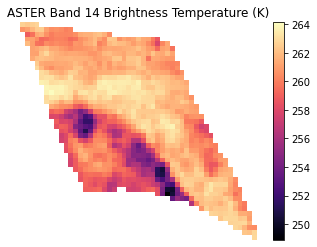

In [8]:
print('Brightness Temperature:')
print('Mean: {}'.format(np.round(tb_mean,2)))
print('Maximum: {}'.format(np.round(tb_max,2)))
print('Minimum: {}'.format(np.round(tb_min,2)))
print('Standard Deviation: {}'.format(np.round(tb_std,2)))

plt.imshow(masked_aster_tb, cmap='magma')
plt.colorbar()
plt.title('ASTER Band 14 Brightness Temperature (K)');
plt.axis('off');